# Uniaxial Tension - Elasticity, Physics Informed Neural Network

Thomas Allard and Samantha Walker

In [40]:
#Imports
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt
import scipy.io
import netCDF4
import xarray as xr

import os

In [41]:
# Specify parameters and things
mode = 'train'   # 'test' to load PINN weights from previously trained model
                # 'train' to train a new model

#trained_file = 'trained-navier-stokes.hdf5'
data_file = '../abaqus/final_elastic/elastic_cdf.nc'

In [42]:
# load in data_file as xarray DataSet
set = xr.open_dataset(data_file)

In [52]:
# Load in displacements and create an ndarray
disp_x=set.sel(field='ux').to_array()
disp_y=set.sel(field='uy').to_array()
disps=np.dstack([disp_x,disp_y])

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    node      <U1 '1'
    field     <U2 'uy'
Data variables: (12/81)
    step_000  float64 ...
    step_001  float64 ...
    step_002  float64 ...
    step_003  float64 ...
    step_004  float64 ...
    step_005  float64 ...
    ...        ...
    step_075  float64 ...
    step_076  float64 ...
    step_077  float64 ...
    step_078  float64 ...
    step_079  float64 ...
    step_080  float64 -1.0

In [44]:
# Extract time and put in an array
time = []
for DataArray in set.values():
    time.append(DataArray.attrs['time'])

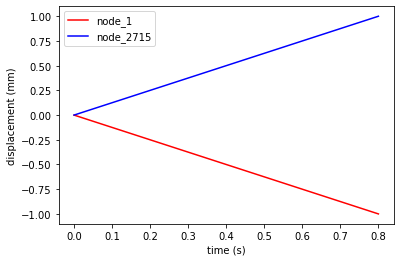

In [55]:
# Check that data loaded in correctly by plotting disp_y for node 1 (bottom left) and node 2715 (top left)
plt.plot(time,set.sel(field='uy',node='1').to_array(),   color='red',label='node_1')
plt.plot(time,set.sel(field='uy',node='2715').to_array(),color='blue',label='node_2715')
plt.xlabel('time (s)')
plt.ylabel('displacement (mm)')
plt.legend()
plt.show()